Question 1: XOR Gate Classification
I. Write the following in the answer sheet. (5 Marks)
• Write the Threshold function.
• Write Truth table for XOR Gate.
• Write the XOR Gate Classification with input with weight initialization W11 = W21 =W12 = W22 =1.
• Find the Optimum weights of W11, W21, W12, W22, V1 and V2 using the threshold function.
• Why does the Single Layer Perceptron struggle to classify the XOR gate?
• What modifications can be made to the neural network model to handle the XOR gate correctly?
II. Implement the following:
(Implementation 5 marks and Visualization and documentation 5 marks)
• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.
• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:
• Create the XOR gate's truth table dataset.
• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.
• Observe and discuss the perceptron's performance in this scenario.
• Implement XOR using Multi-Layer Perceptron.

Single-Layer Perceptron (SLP) for XOR Gate

 Imports and Data Setup
 Importing necessary libraries and sets up the XOR gate input-output pairs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

XOR input and Output

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

Initializa Weights for the Single Layer Perceptron

In [ ]:
W = np.random.rand(2)
b = np.random.rand(1)

Threshold Function

In [ ]:
def threshold(x):
    return 1 if x >= 0 else 0

Training the Perceptron

In [ ]:
learning_rate = 0.1
errors = []
for epoch in range(100):
    total_error = 0
    for i in range(X.shape[0]):
        z = np.dot(X[i], W) + b
        output = threshold(z)
        error = y[i] - output
        total_error += abs(error)
        W += learning_rate * error * X[i]
        b += learning_rate * error
    errors.append(total_error)

Visualization of errors during training

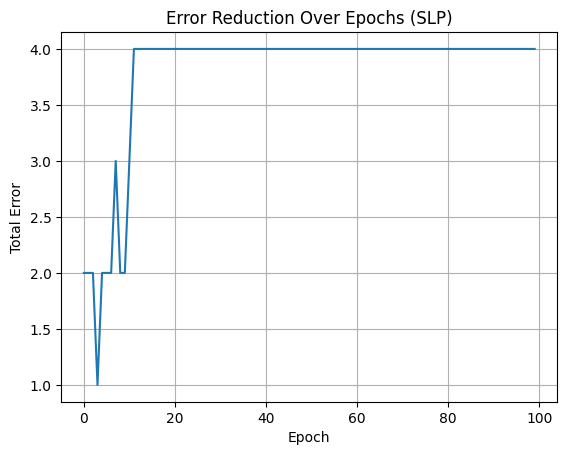

Final Weights (SLP): [-0.11655848 -0.00827496]
Final Bias (SLP): [0.02889492]
Input: [0 0] - Predicted: 1 - Actual: 0
Input: [0 1] - Predicted: 1 - Actual: 1
Input: [1 0] - Predicted: 0 - Actual: 1
Input: [1 1] - Predicted: 0 - Actual: 0


In [ ]:
plt.plot(errors)
plt.title('Error Reduction Over Epochs (SLP)')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.grid(True)
plt.show()

print("Final Weights (SLP):", W)
print("Final Bias (SLP):", b)

for i in range(X.shape[0]):
    z = np.dot(X[i], W) + b
    output = threshold(z)
    print(f"Input: {X[i]} - Predicted: {output} - Actual: {y[i]}")

Multi-Layer Perceptron (MLP)

XOR input and output

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Sigmoid activation function and its derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Initialize weights and biases

In [ ]:
np.random.seed(0)
W1 = np.random.rand(2, 2)
W2 = np.random.rand(2, 1)
b1 = np.random.rand(1, 2)
b2 = np.random.rand(1, 1)

Training the model

In [ ]:
epochs = 10000
learning_rate = 0.1
errors = []
for epoch in range(epochs):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    error = y - final_output
    errors.append(np.mean(np.abs(error)))

    d_output = error * sigmoid_derivative(final_output)
    error_hidden_layer = d_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

    W2 += hidden_output.T.dot(d_output) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

Visualization of errors during training

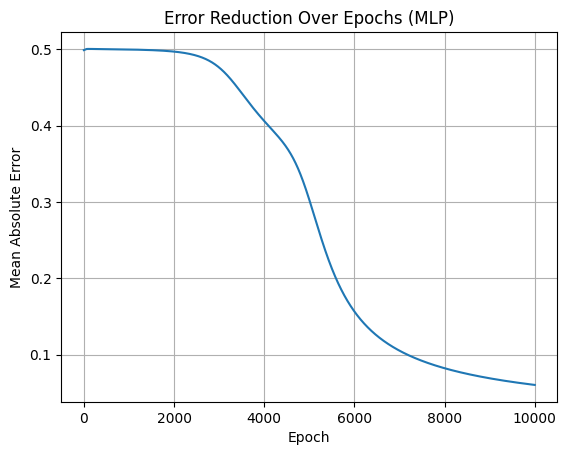

Final Weights (MLP): [[3.63359244 5.73194217]
 [3.63514473 5.73977194]] [[-7.96152045]
 [ 7.34707053]]
Input: [0 0] - Predicted: [[0.]] - Actual: [0]
Input: [0 1] - Predicted: [[1.]] - Actual: [1]
Input: [1 0] - Predicted: [[1.]] - Actual: [1]
Input: [1 1] - Predicted: [[0.]] - Actual: [0]


In [ ]:
plt.plot(errors)
plt.title('Error Reduction Over Epochs (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


print("Final Weights (MLP):", W1, W2)
for i in range(X.shape[0]):
    hidden_input = np.dot(X[i], W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)
    print(f"Input: {X[i]} - Predicted: {final_output.round()} - Actual: {y[i]}")